<strong> Project - Airbnb Price Prediction </strong> <br>
Author - Sharada Sarangan <br>
Date - 11.29.2022

In [1]:
!pip install folium
# for some basic operations
# open a terminal and type:
# conda install -c conda-forge folium
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import re
import sklearn
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('~/Downloads/Detail_listings.csv')


<ipython-input-2-9ef56a5423c7>:1: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('~/Downloads/Detail_listings.csv')


In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,16228948,https://www.airbnb.com/rooms/16228948,20170502172350,42858,Robert Ranch in Los Angeles for filming/wedding,Stunning Ranch Estate situated on 20 acres and...,NaN,Stunning Ranch Estate situated on 20 acres and...,none,NaN,...,NaN,f,NaN,NaN,t,strict,f,f,1,NaN
1,8909380,https://www.airbnb.com/rooms/8909380,20170502172350,42858,Nice quiet private ranch house,NaN,Very private and quite . Hiking horse riding a...,Very private and quite . Hiking horse riding a...,none,I'm in the country what's not to love about that,...,9.0,f,NaN,NaN,f,flexible,f,f,1,1.91
2,14078522,https://www.airbnb.com/rooms/14078522,20170502172350,42858,Room w/private bath on Small Ranch,My place is close to Six Flags Magic Mountain ...,Room with queen bed and private bath,My place is close to Six Flags Magic Mountain ...,none,Horse area. Trails for hiking and riding. Quie...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.72
3,13006928,https://www.airbnb.com/rooms/13006928,20170502172350,42858,Miller Ranch Bunkhouse,"Our place is close to great views, equestrian ...",Please know that we live on a dirt road but it...,"Our place is close to great views, equestrian ...",none,NaN,...,10.0,f,NaN,NaN,t,flexible,f,f,1,2.12
4,7898757,https://www.airbnb.com/rooms/7898757,20170502172350,42858,Studio with full bathroom,Fully furnished studio only a 10 min drive fro...,NaN,Fully furnished studio only a 10 min drive fro...,none,NaN,...,10.0,f,NaN,"City of Los Angeles, CA",f,flexible,f,f,1,0.18


In [4]:
air = df[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'smart_location', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'cleaning_fee', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification','minimum_nights']]

In [5]:
air.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'smart_location',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'cleaning_fee', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'minimum_nights'],
      dtype='object')

In [6]:
# Checking for null values
air.isna().sum()

host_is_superhost                     14
host_has_profile_pic                  14
host_identity_verified                14
neighbourhood_cleansed                 0
city                                  11
state                                  1
zipcode                              395
smart_location                         0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             97
bedrooms                              35
beds                                  59
bed_type                               0
amenities                              0
price                                  0
cleaning_fee                        6974
instant_bookable                       0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_ph

In [7]:
# Removing null values and irrelevant columns

df1 = air[(air['is_location_exact']=='t') & (air['bed_type']=='Real Bed') & (air['beds'].notnull()) & (air['bathrooms'].notnull()) & (air['bedrooms'].notnull())]
df2 = df1[df1['minimum_nights']==1]
df2.shape

(9835, 26)

In [8]:
df1.shape

(23951, 26)

In [9]:
# Checking null values after cleaning

df2.dtypes

host_is_superhost                    object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
city                                 object
state                                object
zipcode                              object
smart_location                       object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
price                                 int64
cleaning_fee                        float64
instant_bookable                     object
cancellation_policy             

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df2.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,minimum_nights
0,f,t,f,Acton,Acton,CA,93510,"Acton, CA",34.530350,-118.227088,t,House,Entire home/apt,10,7.0,5.0,5.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",Pool,K...",3000,200.0,t,strict,f,f,1
2,t,t,t,Acton,Acton,CA,93510,"Acton, CA",34.510130,-118.212407,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",""Wheel...",55,NaN,f,flexible,f,f,1
3,t,t,f,Acton,Acton,CA,93510,"Acton, CA",34.515486,-118.230742,t,Other,Entire home/apt,6,1.0,1.0,3.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",150,35.0,t,flexible,f,f,1
4,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.031419,-118.299016,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",30,5.0,f,flexible,f,f,1
6,t,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.032502,-118.297748,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Free parking on...",45,5.0,f,moderate,f,f,1


In [11]:
df2.drop(columns=['is_location_exact','bed_type'],inplace=True)

<ipython-input-11-4986f038e435>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['is_location_exact','bed_type'],inplace=True)


In [12]:
df2.shape

(9835, 24)

In [13]:
df2.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,minimum_nights
0,f,t,f,Acton,Acton,CA,93510,"Acton, CA",34.530350,-118.227088,House,Entire home/apt,10,7.0,5.0,5.0,"{""Wireless Internet"",""Air conditioning"",Pool,K...",3000,200.0,t,strict,f,f,1
2,t,t,t,Acton,Acton,CA,93510,"Acton, CA",34.510130,-118.212407,House,Private room,2,1.0,1.0,1.0,"{""Wireless Internet"",""Air conditioning"",""Wheel...",55,NaN,f,flexible,f,f,1
3,t,t,f,Acton,Acton,CA,93510,"Acton, CA",34.515486,-118.230742,Other,Entire home/apt,6,1.0,1.0,3.0,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",150,35.0,t,flexible,f,f,1
4,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.031419,-118.299016,Apartment,Private room,1,1.0,1.0,1.0,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",30,5.0,f,flexible,f,f,1
6,t,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.032502,-118.297748,House,Private room,2,1.0,1.0,1.0,"{Internet,""Wireless Internet"",""Free parking on...",45,5.0,f,moderate,f,f,1


In [14]:
# Replacing the $ and , in price column -- Changed in excel

#df2.loc['price'] = df2['price'].str.replace("$","")
#df2.loc['price'] = df2['price'].str.replace(",","")

# Converting price from object to float type

# df2.loc['price'] = df2['price'].astype(float)

In [15]:
df2.dtypes

host_is_superhost                    object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
city                                 object
state                                object
zipcode                              object
smart_location                       object
latitude                            float64
longitude                           float64
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
amenities                            object
price                                 int64
cleaning_fee                        float64
instant_bookable                     object
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification

<AxesSubplot:>

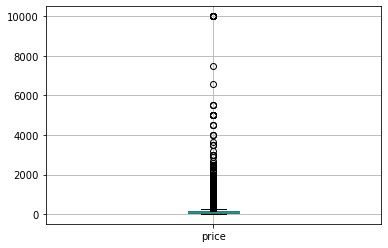

In [16]:
df2.boxplot('price')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


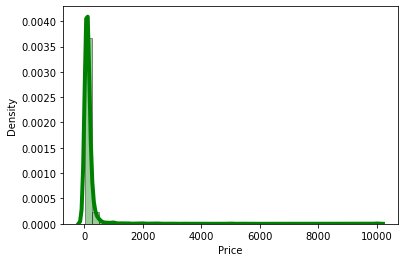

In [17]:
sns.distplot(df2['price'], hist=True, kde=True, 
              color = 'green', 
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth': 4}, bins =40)
plt.xlabel('Price')
plt.show()

In [18]:
df2.shape

(9835, 24)

In [19]:
# Checking the different quantile values
df2['price'].quantile([0, 0.01, 0.10, 0.25, 0.3, 0.5, 0.6, 0.75, 0.8, 0.9, 0.95,0.98, 0.99, 1])

0.00       10.0
0.01       22.0
0.10       45.0
0.25       65.0
0.30       70.0
0.50       95.0
0.60      109.0
0.75      149.0
0.80      165.0
0.90      247.0
0.95      350.0
0.98      750.0
0.99     1350.0
1.00    10000.0
Name: price, dtype: float64

In [20]:
df3 = df2[df2['price'].between(df2['price'].quantile(.01), df2['price'].quantile(.98))]

In [21]:
df3.shape

(9547, 24)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


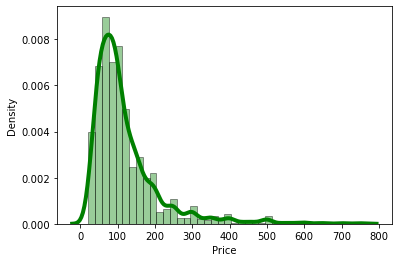

In [22]:
sns.distplot(df3['price'], hist=True, kde=True, 
              color = 'green', 
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth': 4}, bins =40)
plt.xlabel('Price')
plt.show()

<AxesSubplot:>

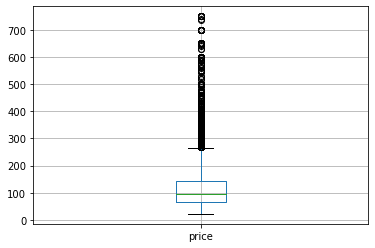

In [23]:
df3.boxplot('price')

In [24]:
df3.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,minimum_nights
2,t,t,t,Acton,Acton,CA,93510,"Acton, CA",34.510130,-118.212407,House,Private room,2,1.0,1.0,1.0,"{""Wireless Internet"",""Air conditioning"",""Wheel...",55,NaN,f,flexible,f,f,1
3,t,t,f,Acton,Acton,CA,93510,"Acton, CA",34.515486,-118.230742,Other,Entire home/apt,6,1.0,1.0,3.0,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",150,35.0,t,flexible,f,f,1
4,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.031419,-118.299016,Apartment,Private room,1,1.0,1.0,1.0,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",30,5.0,f,flexible,f,f,1
6,t,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.032502,-118.297748,House,Private room,2,1.0,1.0,1.0,"{Internet,""Wireless Internet"",""Free parking on...",45,5.0,f,moderate,f,f,1
8,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.035359,-118.299137,House,Entire home/apt,2,1.5,2.0,1.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",350,NaN,f,flexible,f,f,1


In [25]:
df3.to_csv(r'C:\Users\ADMIN\Desktop\Sharada PG Documents\UCI\08. Study Materials\07. Machine Learning\03. Group Project\Files\Cleaned1.csv', index=False)

In [26]:
df3.skew(axis = 0, skipna = True, numeric_only = True)
# Skewness of price is high

latitude         -0.149434
longitude         0.763894
accommodates      2.511032
bathrooms         4.091431
bedrooms          2.009721
beds              4.273758
price             2.612010
cleaning_fee      2.265953
minimum_nights    0.000000
dtype: float64

In [27]:
# Taking log to avoid skewness

df3["price_log"] = np.log2(df3['price'] + 1)

<ipython-input-27-389e39716975>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["price_log"] = np.log2(df3['price'] + 1)


In [28]:
df3.head(3)

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,minimum_nights,price_log
2,t,t,t,Acton,Acton,CA,93510,"Acton, CA",34.510130,-118.212407,House,Private room,2,1.0,1.0,1.0,"{""Wireless Internet"",""Air conditioning"",""Wheel...",55,NaN,f,flexible,f,f,1,5.807355
3,t,t,f,Acton,Acton,CA,93510,"Acton, CA",34.515486,-118.230742,Other,Entire home/apt,6,1.0,1.0,3.0,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",150,35.0,t,flexible,f,f,1,7.238405
4,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.031419,-118.299016,Apartment,Private room,1,1.0,1.0,1.0,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",30,5.0,f,flexible,f,f,1,4.954196


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


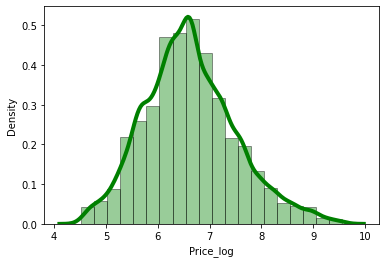

In [29]:
# The data is distributed normally after taking log

sns.distplot(df3['price_log'], hist=True, kde=True, 
              color = 'green', 
              hist_kws={'edgecolor':'black'}, 
              kde_kws={'linewidth': 4}, bins = 20)
plt.xlabel('Price_log')
plt.show()

In [30]:
df3.amenities.head()

2    {"Wireless Internet","Air conditioning","Wheel...
3    {TV,"Wireless Internet","Air conditioning",Poo...
4    {Internet,"Wireless Internet",Kitchen,"Free pa...
6    {Internet,"Wireless Internet","Free parking on...
8    {TV,"Wireless Internet","Air conditioning",Kit...
Name: amenities, dtype: object

In [31]:
#df3.loc['amenities_new'] = df3["amenities"].astype(str)
df3["amenities_new"] = df3["amenities"].apply(lambda x: str(x))

<ipython-input-31-30da7c7d6f1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["amenities_new"] = df3["amenities"].apply(lambda x: str(x))


In [32]:
df3.dtypes

host_is_superhost                    object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
city                                 object
state                                object
zipcode                              object
smart_location                       object
latitude                            float64
longitude                           float64
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
amenities                            object
price                                 int64
cleaning_fee                        float64
instant_bookable                     object
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification

In [33]:
df3.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,minimum_nights,price_log,amenities_new
2,t,t,t,Acton,Acton,CA,93510,"Acton, CA",34.510130,-118.212407,House,Private room,2,1.0,1.0,1.0,"{""Wireless Internet"",""Air conditioning"",""Wheel...",55,NaN,f,flexible,f,f,1,5.807355,"{""Wireless Internet"",""Air conditioning"",""Wheel..."
3,t,t,f,Acton,Acton,CA,93510,"Acton, CA",34.515486,-118.230742,Other,Entire home/apt,6,1.0,1.0,3.0,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",150,35.0,t,flexible,f,f,1,7.238405,"{TV,""Wireless Internet"",""Air conditioning"",Poo..."
4,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.031419,-118.299016,Apartment,Private room,1,1.0,1.0,1.0,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",30,5.0,f,flexible,f,f,1,4.954196,"{Internet,""Wireless Internet"",Kitchen,""Free pa..."
6,t,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.032502,-118.297748,House,Private room,2,1.0,1.0,1.0,"{Internet,""Wireless Internet"",""Free parking on...",45,5.0,f,moderate,f,f,1,5.523562,"{Internet,""Wireless Internet"",""Free parking on..."
8,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.035359,-118.299137,House,Entire home/apt,2,1.5,2.0,1.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",350,NaN,f,flexible,f,f,1,8.455327,"{TV,""Wireless Internet"",""Air conditioning"",Kit..."


In [34]:
df3['amenities_new'] = df3['amenities_new'].str.lower() # converting to lower case
df3['amenities_cleaned'] = df3["amenities_new"].str.replace('[^A-Za-z0-9]', ' ')

<ipython-input-34-fcfff70d7852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['amenities_new'] = df3['amenities_new'].str.lower() # converting to lower case
<ipython-input-34-fcfff70d7852>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['amenities_cleaned'] = df3["amenities_new"].str.replace('[^A-Za-z0-9]', ' ')
<ipython-input-34-fcfff70d7852>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['amenities_cleaned'] = df3["amenities_new"].str.rep

In [35]:
df3.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,minimum_nights,price_log,amenities_new,amenities_cleaned
2,t,t,t,Acton,Acton,CA,93510,"Acton, CA",34.510130,-118.212407,House,Private room,2,1.0,1.0,1.0,"{""Wireless Internet"",""Air conditioning"",""Wheel...",55,NaN,f,flexible,f,f,1,5.807355,"{""wireless internet"",""air conditioning"",""wheel...",wireless internet air conditioning wheel...
3,t,t,f,Acton,Acton,CA,93510,"Acton, CA",34.515486,-118.230742,Other,Entire home/apt,6,1.0,1.0,3.0,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",150,35.0,t,flexible,f,f,1,7.238405,"{tv,""wireless internet"",""air conditioning"",poo...",tv wireless internet air conditioning poo...
4,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.031419,-118.299016,Apartment,Private room,1,1.0,1.0,1.0,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",30,5.0,f,flexible,f,f,1,4.954196,"{internet,""wireless internet"",kitchen,""free pa...",internet wireless internet kitchen free pa...
6,t,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.032502,-118.297748,House,Private room,2,1.0,1.0,1.0,"{Internet,""Wireless Internet"",""Free parking on...",45,5.0,f,moderate,f,f,1,5.523562,"{internet,""wireless internet"",""free parking on...",internet wireless internet free parking on...
8,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.035359,-118.299137,House,Entire home/apt,2,1.5,2.0,1.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",350,NaN,f,flexible,f,f,1,8.455327,"{tv,""wireless internet"",""air conditioning"",kit...",tv wireless internet air conditioning kit...


In [36]:
df3.price.describe()

count    9547.000000
mean      119.696135
std        91.099576
min        22.000000
25%        65.000000
50%        95.000000
75%       145.000000
max       750.000000
Name: price, dtype: float64

In [37]:
# Introducing columns to include essential amenities

df3['Internet'] = [1 if 'internet' in s else 0 for s in df3["amenities_new"]]
df3['Parking'] = [1 if 'parking' in s else 0 for s in df3["amenities_new"]]
df3['Breakfast'] = [1 if 'breakfast' in s else 0 for s in df3["amenities_new"]]
df3['TV'] = [1 if 'tv' in s else 0 for s in df3["amenities_new"]]
df3['Pool'] = [1 if 'pool' in s else 0 for s in df3["amenities_new"]]
df3['Kitchen'] = [1 if 'kitchen' in s else 0 for s in df3["amenities_new"]]
df3['Air_Conditioning'] = [1 if 'air conditioning' in s else 0 for s in df3["amenities_new"]]
df3['Hot_tub'] = [1 if 'hot tub' in s else 0 for s in df3["amenities_new"]]
df3['Washer'] = [1 if 'washer' in s else 0 for s in df3["amenities_new"]]
df3['Dryer'] = [1 if 'dryer' in s else 0 for s in df3["amenities_new"]]
df3['Gym'] = [1 if 'gym' in s else 0 for s in df3["amenities_new"]]

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]
labels =["0-50","50-100","100-150","150-200", "200-250", "250-300", "300-350", "350-400", "400-450", "450-500", "500-550", "550-600", "600-650", "650-700", "700-750"]
df3['price_binned'] = pd.cut(df3['price'], bins,labels=labels)

<ipython-input-37-37a5d27c83f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Internet'] = [1 if 'internet' in s else 0 for s in df3["amenities_new"]]
<ipython-input-37-37a5d27c83f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Parking'] = [1 if 'parking' in s else 0 for s in df3["amenities_new"]]
<ipython-input-37-37a5d27c83f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [38]:
df3['TV'].value_counts()

1    7157
0    2390
Name: TV, dtype: int64

In [39]:
df3.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,minimum_nights,price_log,amenities_new,amenities_cleaned,Internet,Parking,Breakfast,TV,Pool,Kitchen,Air_Conditioning,Hot_tub,Washer,Dryer,Gym,price_binned
2,t,t,t,Acton,Acton,CA,93510,"Acton, CA",34.510130,-118.212407,House,Private room,2,1.0,1.0,1.0,"{""Wireless Internet"",""Air conditioning"",""Wheel...",55,NaN,f,flexible,f,f,1,5.807355,"{""wireless internet"",""air conditioning"",""wheel...",wireless internet air conditioning wheel...,1,1,0,0,0,1,1,0,1,1,0,50-100
3,t,t,f,Acton,Acton,CA,93510,"Acton, CA",34.515486,-118.230742,Other,Entire home/apt,6,1.0,1.0,3.0,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",150,35.0,t,flexible,f,f,1,7.238405,"{tv,""wireless internet"",""air conditioning"",poo...",tv wireless internet air conditioning poo...,1,1,1,1,1,1,1,1,1,1,0,100-150
4,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.031419,-118.299016,Apartment,Private room,1,1.0,1.0,1.0,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",30,5.0,f,flexible,f,f,1,4.954196,"{internet,""wireless internet"",kitchen,""free pa...",internet wireless internet kitchen free pa...,1,1,0,0,0,1,0,0,1,1,0,0-50
6,t,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.032502,-118.297748,House,Private room,2,1.0,1.0,1.0,"{Internet,""Wireless Internet"",""Free parking on...",45,5.0,f,moderate,f,f,1,5.523562,"{internet,""wireless internet"",""free parking on...",internet wireless internet free parking on...,1,1,0,0,0,0,0,0,0,0,0,0-50
8,f,t,t,Adams-Normandie,Los Angeles,CA,90007,"Los Angeles, CA",34.035359,-118.299137,House,Entire home/apt,2,1.5,2.0,1.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",350,NaN,f,flexible,f,f,1,8.455327,"{tv,""wireless internet"",""air conditioning"",kit...",tv wireless internet air conditioning kit...,1,1,0,1,0,1,1,0,1,1,0,300-350


In [40]:
df3.minimum_nights.value_counts()

1    9547
Name: minimum_nights, dtype: int64

In [41]:
df3.dtypes

host_is_superhost                     object
host_has_profile_pic                  object
host_identity_verified                object
neighbourhood_cleansed                object
city                                  object
state                                 object
zipcode                               object
smart_location                        object
latitude                             float64
longitude                            float64
property_type                         object
room_type                             object
accommodates                           int64
bathrooms                            float64
bedrooms                             float64
beds                                 float64
amenities                             object
price                                  int64
cleaning_fee                         float64
instant_bookable                      object
cancellation_policy                   object
require_guest_profile_picture         object
require_gu

In [42]:
columns_req = ['host_is_superhost', 'latitude', 'longitude','room_type','accommodates', 'bathrooms', 
               'bedrooms','beds', 'instant_bookable', 'cancellation_policy','Internet', 'Parking', 'Breakfast', 'TV',
               'Pool', 'Kitchen', 'Air_Conditioning', 'Hot_tub', 'Washer', 'Dryer','Gym','price_log', 'price', 'price_binned']

In [43]:
df4 = df3[columns_req]

In [44]:
df4.head()

,host_is_superhost,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,instant_bookable,cancellation_policy,Internet,Parking,Breakfast,TV,Pool,Kitchen,Air_Conditioning,Hot_tub,Washer,Dryer,Gym,price_log,price,price_binned
2,t,34.510130,-118.212407,Private room,2,1.0,1.0,1.0,f,flexible,1,1,0,0,0,1,1,0,1,1,0,5.807355,55,50-100
3,t,34.515486,-118.230742,Entire home/apt,6,1.0,1.0,3.0,t,flexible,1,1,1,1,1,1,1,1,1,1,0,7.238405,150,100-150
4,f,34.031419,-118.299016,Private room,1,1.0,1.0,1.0,f,flexible,1,1,0,0,0,1,0,0,1,1,0,4.954196,30,0-50
6,t,34.032502,-118.297748,Private room,2,1.0,1.0,1.0,f,moderate,1,1,0,0,0,0,0,0,0,0,0,5.523562,45,0-50
8,f,34.035359,-118.299137,Entire home/apt,2,1.5,2.0,1.0,f,flexible,1,1,0,1,0,1,1,0,1,1,0,8.455327,350,300-350


In [45]:
# Encoding categorical columns to integers
from sklearn.preprocessing import LabelEncoder
       
df4[['host_is_superhost','room_type','instant_bookable','cancellation_policy']] =  df4[['host_is_superhost','room_type','instant_bookable','cancellation_policy']].apply(LabelEncoder().fit_transform)

<ipython-input-45-aab58f1b02ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[['host_is_superhost','room_type','instant_bookable','cancellation_policy']] =  df4[['host_is_superhost','room_type','instant_bookable','cancellation_policy']].apply(LabelEncoder().fit_transform)


In [46]:
df4.dtypes

host_is_superhost         int32
latitude                float64
longitude               float64
room_type                 int32
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
instant_bookable          int32
cancellation_policy       int32
Internet                  int64
Parking                   int64
Breakfast                 int64
TV                        int64
Pool                      int64
Kitchen                   int64
Air_Conditioning          int64
Hot_tub                   int64
Washer                    int64
Dryer                     int64
Gym                       int64
price_log               float64
price                     int64
price_binned           category
dtype: object

<AxesSubplot:>

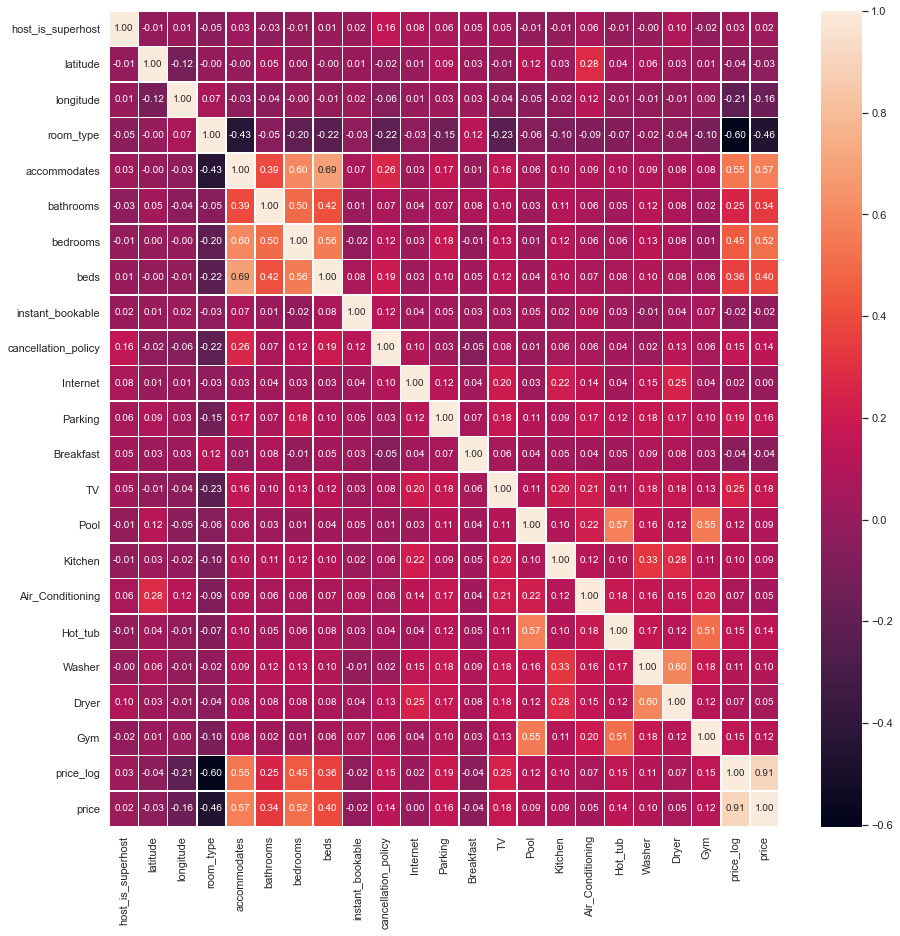

In [47]:
# Trying to check correlation between features

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df4[['host_is_superhost', 'latitude', 'longitude','room_type','accommodates', 'bathrooms', 
               'bedrooms','beds', 'instant_bookable', 'cancellation_policy','Internet', 'Parking', 'Breakfast', 'TV',
               'Pool', 'Kitchen', 'Air_Conditioning', 'Hot_tub', 'Washer', 'Dryer','Gym','price_log', 'price']].corr(),annot=True,annot_kws={"size":10}, fmt=".2f", linewidth=.5)

# It can be seen that there is no high correlation between the features

In [48]:
df4.to_csv(r'C:\Users\ADMIN\Desktop\Sharada PG Documents\UCI\08. Study Materials\07. Machine Learning\03. Group Project\Files\listings_cleaned_11_25.csv', index=False)

In [49]:
train = df4.sample(frac=0.8, random_state=42) 
test = df4.drop(train.index)

In [50]:
train.shape

(7638, 24)

In [51]:
test.shape

(1909, 24)

### Predicting the accuracy of the model with 'price' as the class variable

In [52]:
train_X = train[['host_is_superhost', 'latitude', 'longitude','room_type','accommodates', 'bathrooms', 
               'bedrooms','beds', 'instant_bookable', 'cancellation_policy','Internet', 'Parking', 'Breakfast', 'TV',
               'Pool', 'Kitchen', 'Air_Conditioning', 'Hot_tub', 'Washer', 'Dryer','Gym']]

In [53]:
train_Y = train['price']

In [54]:
validation_Y = test['price']
validation_X = test[['host_is_superhost', 'latitude', 'longitude','room_type','accommodates', 'bathrooms', 
               'bedrooms','beds', 'instant_bookable', 'cancellation_policy','Internet', 'Parking', 'Breakfast', 'TV',
               'Pool', 'Kitchen', 'Air_Conditioning', 'Hot_tub', 'Washer', 'Dryer','Gym']]

# Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf = clf.fit(train_X,train_Y)
y_pred = clf.predict(validation_X)
mean_absolute_error(validation_Y, y_pred)

47.38920900995286

### Predicting the accuracy of the model with 'log_price' as the class variable

In [56]:
train_X_V2 = train[['host_is_superhost', 'latitude', 'longitude','room_type','accommodates', 'bathrooms', 
               'bedrooms','beds', 'instant_bookable', 'cancellation_policy','Internet', 'Parking', 'Breakfast', 'TV',
               'Pool', 'Kitchen', 'Air_Conditioning', 'Hot_tub', 'Washer', 'Dryer','Gym']]
train_Y_V2 = train['price_log']

In [57]:
validation_Y_V2 = test['price_log']
validation_X_V2 = test[['host_is_superhost', 'latitude', 'longitude','room_type','accommodates', 'bathrooms', 
               'bedrooms','beds', 'instant_bookable', 'cancellation_policy','Internet', 'Parking', 'Breakfast', 'TV',
               'Pool', 'Kitchen', 'Air_Conditioning', 'Hot_tub', 'Washer', 'Dryer','Gym']]

In [58]:
# Checking how to take anti log of a value
a = 90
log_value = np.log2(a + 1)
log_value

6.507794640198696

In [59]:
# Checking how to take anti log of a value
np.power(2,log_value) - 1

90.0

In [60]:
leaf_nodes = [5, 10, 20, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 250]
mae = []

for i in leaf_nodes:
    clf = DecisionTreeRegressor(max_leaf_nodes = i)
    clf = clf.fit(train_X_V2,train_Y_V2)
    y_pred_V2 = clf.predict(validation_X_V2)
    y_pred_antilog = np.power(2,y_pred_V2) - 1
    mae.append(mean_absolute_error(validation_Y, y_pred_antilog))
    

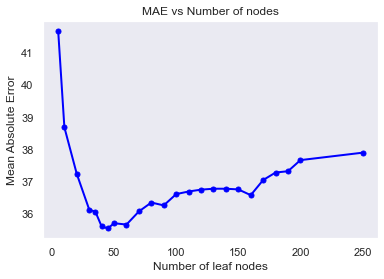

In [61]:
plt.plot(leaf_nodes, mae, color='blue', linewidth = 2,
         marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('Number of leaf nodes')
# naming the y axis
plt.ylabel('Mean Absolute Error')
plt.grid(False)
# giving a title to my graph
plt.title('MAE vs Number of nodes')
  
# function to show the plot
plt.show()

In [62]:
clf = DecisionTreeRegressor(max_leaf_nodes = 45)
clf = clf.fit(train_X_V2,train_Y_V2)
y_pred_V2 = clf.predict(validation_X_V2)
y_pred_antilog = np.power(2,y_pred_V2) - 1

mean_absolute_error(validation_Y, y_pred_antilog)

35.551704365848046

In [63]:
mean_absolute_percentage_error(validation_Y, y_pred_antilog)

0.29985305977951654

In [64]:
# Checking R2 for the model with max_leaf_nodes = 45

from sklearn.metrics import r2_score
r2_score(validation_Y, y_pred_antilog)

0.5115445591012098

In [65]:
# Checking MAPE for the model with max_leaf_nodes = 45
mean_absolute_percentage_error(validation_Y, y_pred_antilog)

0.29985305977951654

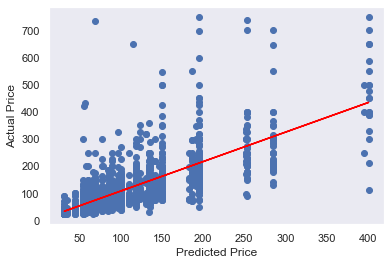

In [66]:
plt.scatter(y_pred_antilog,validation_Y, s=None, c=None, marker=None, linewidths=None, edgecolors=None) 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.grid(False)

#find line of best fit
a, b = np.polyfit(y_pred_antilog,validation_Y, 1)

#add line of best fit to plot
plt.plot(y_pred_antilog, (a*y_pred_antilog)+b, color = 'red')     

In [67]:
a

1.0845729874326882

In [68]:
b

-0.41738787006501094

### Repeating the above steps after removing 'accommodate' columns

In [69]:
train_X_V3 = train[['host_is_superhost', 'latitude', 'longitude','room_type', 'bathrooms', 
               'bedrooms','beds', 'instant_bookable', 'cancellation_policy','Internet', 'Parking', 'Breakfast', 'TV',
               'Pool', 'Kitchen', 'Air_Conditioning', 'Hot_tub', 'Washer', 'Dryer','Gym']]
train_Y_V3 = train['price_log']

In [70]:
validation_Y_V3 = test['price_log']
validation_X_V3 = test[['host_is_superhost','latitude', 'longitude','room_type', 'bathrooms', 
               'bedrooms','beds', 'instant_bookable', 'cancellation_policy','Internet', 'Parking', 'Breakfast', 'TV',
               'Pool', 'Kitchen', 'Air_Conditioning', 'Hot_tub', 'Washer', 'Dryer','Gym']]

In [71]:
leaf_nodes = [5, 10, 20, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 250]
mae = []
mape = []
for i in leaf_nodes:
    clf = DecisionTreeRegressor(max_leaf_nodes = i)
    clf = clf.fit(train_X_V3,train_Y_V3)
    y_pred_V3 = clf.predict(validation_X_V3)
    y_pred_antilog = np.power(2,y_pred_V3) - 1
    mae.append(mean_absolute_error(validation_Y, y_pred_antilog))
    mape.append(mean_absolute_percentage_error(validation_Y, y_pred_antilog))
    

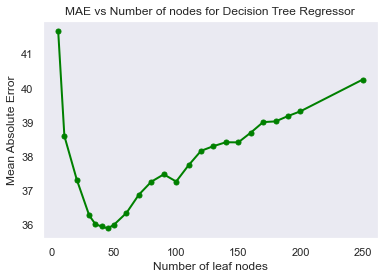

In [72]:
plt.plot(leaf_nodes, mae, color='green', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=5)
plt.xlabel('Number of leaf nodes')
# naming the y axis
plt.ylabel('Mean Absolute Error')
plt.grid(False)
# giving a title to my graph
plt.title('MAE vs Number of nodes for Decision Tree Regressor')
  
# function to show the plot
plt.show()

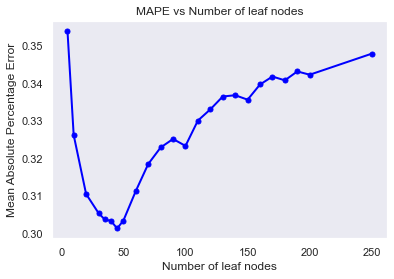

In [73]:
plt.plot(leaf_nodes, mape, color='blue', linewidth = 2,
         marker='o', markerfacecolor='blue', markersize=5)

plt.xlabel('Number of leaf nodes')
# naming the y axis
plt.ylabel('Mean Absolute Percentage Error')
plt.grid(False)
# giving a title to my graph
plt.title('MAPE vs Number of leaf nodes')
  
# function to show the plot
plt.show()

In [74]:
clf = DecisionTreeRegressor(max_leaf_nodes = 45)
clf = clf.fit(train_X_V3,train_Y_V3)
y_pred_V3 = clf.predict(validation_X_V3)
y_pred_antilog = np.power(2,y_pred_V3) - 1

mean_absolute_error(validation_Y, y_pred_antilog)

35.89686207265578

In [75]:
mean_absolute_percentage_error(validation_Y, y_pred_antilog)

0.30135331227584156

In [76]:
# Checking R2 for the model with max_leaf_nodes = 45

from sklearn.metrics import r2_score
r2_score(validation_Y, y_pred_antilog)

0.5044062214480649

#### Accuracy did not improved in the above trial

# KNN Model

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [78]:
train_X_KNN = train[['host_is_superhost', 'latitude', 'longitude','room_type','accommodates', 'bathrooms', 
               'bedrooms','beds', 'instant_bookable', 'cancellation_policy','Internet', 'Parking', 'Breakfast', 'TV',
               'Pool', 'Kitchen', 'Air_Conditioning', 'Hot_tub', 'Washer', 'Dryer','Gym']]
train_Y_KNN = train['price_log']

In [79]:
validation_Y_KNN = test['price_log']
validation_X_KNN = test[['host_is_superhost', 'latitude', 'longitude','room_type','accommodates', 'bathrooms', 
               'bedrooms','beds', 'instant_bookable', 'cancellation_policy','Internet', 'Parking', 'Breakfast', 'TV',
               'Pool', 'Kitchen', 'Air_Conditioning', 'Hot_tub', 'Washer', 'Dryer','Gym']]

In [90]:
knn_neighbours = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mae_knn = []
mape_knn = []

for i in knn_neighbours:
    model = KNeighborsRegressor(n_neighbors = i, algorithm = 'ball_tree')
    model_knn = model.fit(train_X_KNN,train_Y_KNN)
    y_pred_KNN = model_knn.predict(validation_X_KNN)
    y_pred_antilog_KNN = np.power(2,y_pred_KNN) - 1
    mean_absolute_error(validation_Y, y_pred_antilog_KNN)
    mae_knn.append(mean_absolute_error(validation_Y, y_pred_antilog_KNN))
    mape_knn.append(mean_absolute_percentage_error(validation_Y, y_pred_antilog_KNN))

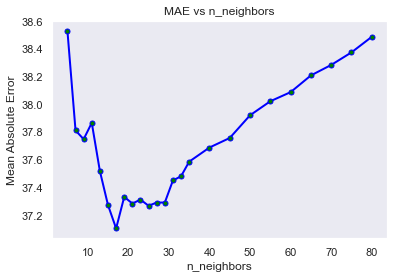

In [81]:
plt.plot(knn_neighbours, mae_knn, color='blue', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=5)
plt.xlabel('n_neighbors')
# naming the y axis
plt.ylabel('Mean Absolute Error')
plt.grid(False)

plt.title('MAE vs n_neighbors')  
# function to show the plot
plt.show()

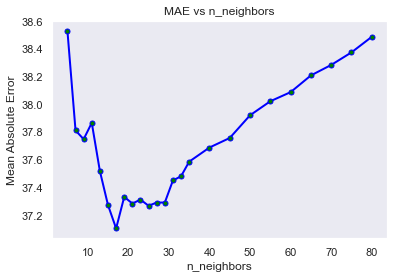

In [91]:
plt.plot(knn_neighbours, mae_knn, color='blue', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=5)
plt.xlabel('n_neighbors')
# naming the y axis
plt.ylabel('Mean Absolute Error')
plt.grid(False)

plt.title('MAE vs n_neighbors')  
# function to show the plot
plt.show()

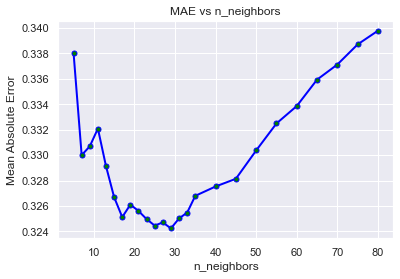

In [82]:
plt.plot(knn_neighbours, mape_knn, color='blue', linewidth = 2,
         marker='o', markerfacecolor='green', markersize=5)
plt.xlabel('n_neighbors')
# naming the y axis
plt.ylabel('Mean Absolute Error')
  
# giving a title to my graph
plt.title('MAE vs n_neighbors')
  
# function to show the plot
plt.show()

In [94]:

model = KNeighborsRegressor(n_neighbors=17)

In [95]:
model_knn = model.fit(train_X_KNN,train_Y_KNN)
y_pred_KNN = model_knn.predict(validation_X_KNN)
y_pred_antilog_KNN = np.power(2,y_pred_KNN) - 1

mean_absolute_error(validation_Y, y_pred_antilog_KNN)

37.105697826613685

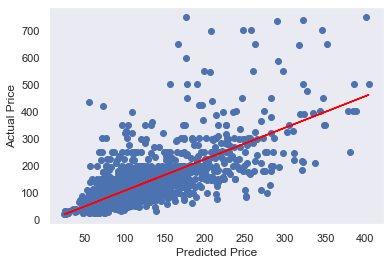

In [85]:
plt.scatter(y_pred_antilog_KNN,validation_Y, s=None, c=None, marker=None, linewidths=None, edgecolors=None) 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.grid(False)

#find line of best fit
a, b = np.polyfit(y_pred_antilog_KNN,validation_Y, 1)

#add line of best fit to plot
plt.plot(y_pred_antilog_KNN, (a*y_pred_antilog_KNN)+b, color = 'red')     

In [86]:
a

1.1643201439291395

In [87]:
mean_absolute_percentage_error(validation_Y, y_pred_antilog_KNN)

0.32512461250363295

In [88]:
mean_squared_error(validation_Y, y_pred_antilog_KNN, squared=False)

64.70101029363782

In [89]:
# Checking R2 for the model with max_leaf_nodes = 45
from sklearn.metrics import r2_score
r2_score(validation_Y, y_pred_antilog_KNN)

0.5065167531304288